In [1]:
try:
    import fyers_apiv3
    print("'fyers-apiv3' is already installed.")
except ImportError:
    print("'fyers-apiv3' not found, installing...")
    !pip install fyers-apiv3
    print("'fyers-apiv3' installed successfully.")


'fyers-apiv3' is already installed.


In [16]:
import webbrowser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
import os
from fyers_apiv3 import fyersModel
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
warnings.filterwarnings('ignore')


In [6]:
redirect_uri= "https://trade.fyers.in/api-login/redirect-uri/index.html"  ## redircet_uri you entered while creating APP.
client_id = "3VRBZEFVMW-100"                       ## Client_id here refers to APP_ID of the created app
secret_key = "M56JNN54BV"                          ## app_secret key which you got after creating the app
grant_type = "authorization_code"                  ## The grant_type always has to be "authorization_code"
response_type = "code"                             ## The response_type always has to be "code"
state = "sample"

In [7]:
appSession = fyersModel.SessionModel(client_id = client_id, redirect_uri = redirect_uri,response_type=response_type,state=state,secret_key=secret_key,grant_type=grant_type)

In [8]:
generateTokenUrl = appSession.generate_authcode()

In [9]:
print((generateTokenUrl))
webbrowser.open(generateTokenUrl,new=1)


https://api-t1.fyers.in/api/v3/generate-authcode?client_id=3VRBZEFVMW-100&redirect_uri=https%3A%2F%2Ftrade.fyers.in%2Fapi-login%2Fredirect-uri%2Findex.html&response_type=code&state=sample


False

In [10]:
auth_code = 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJhcHBfaWQiOiIzVlJCWkVGVk1XIiwidXVpZCI6ImFhNzU2ZWUxNmU5NjQ3NThhMTY0NjRiNTI3MmViNTk1IiwiaXBBZGRyIjoiIiwibm9uY2UiOiIiLCJzY29wZSI6IiIsImRpc3BsYXlfbmFtZSI6IkZBSDg2OTcxIiwib21zIjoiSzEiLCJoc21fa2V5IjoiZTBiMDljNmQ2MTZmZmQ5NDMyY2Q5YWQ5NWQxYTBmNmYzZGQwNTZhMThiNzFlMWRjMTdkMjdkMTYiLCJpc0RkcGlFbmFibGVkIjoiTiIsImlzTXRmRW5hYmxlZCI6Ik4iLCJhdWQiOiJbXCJkOjFcIixcImQ6MlwiLFwieDowXCIsXCJ4OjFcIixcIng6MlwiXSIsImV4cCI6MTc2ODE3MDk2MSwiaWF0IjoxNzY4MTQwOTYxLCJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJuYmYiOjE3NjgxNDA5NjEsInN1YiI6ImF1dGhfY29kZSJ9.cNhV1tNpBjkMVZmnKuZgWynaOvLQjzZag4zncv1z7OU'
appSession.set_token(auth_code)
response = appSession.generate_token()

## There can be two cases over here you can successfully get the acccessToken over the request or you might get some error over here. so to avoid that have this in try except block
try:
    access_token = response["access_token"]
except Exception as e:
    print(e,response)  ## This will help you in debugging then and there itself like what was the error and also you would be able to see the value you got in response variable. instead of getting key_error for unsuccessfull response.



In [11]:
## Once you have generated accessToken now we can call multiple trading related or data related apis after that in order to do so we need to first initialize the fyerModel object with all the requried params.
"""
fyerModel object takes following values as arguments
1. accessToken : this is the one which you received from above
2. client_id : this is basically the app_id for the particular app you logged into
"""
fyers = fyersModel.FyersModel(token=access_token,is_async=False,client_id=client_id,log_path="")

In [12]:
data = {
    "symbol": "NSE:IRCON-EQ",
    "resolution": "D",           # 'D' for Daily candles
    "date_format": "1",          # Set to '1' to use readable dates
    "range_from": "2025-11-01",  # Start date (yyyy-mm-dd)
    "range_to": "2025-12-31",    # End date (yyyy-mm-dd)
    "cont_flag": "1"             # Continuous data (keep as '1')
}

# Fetch and print the data
response = fyers.history(data=data)
print(response)

{'candles': [[1762128000, 169.51, 171.72, 169, 169.38, 1253481], [1762214400, 169.63, 169.89, 167.47, 168.16, 1387725], [1762387200, 168.44, 168.44, 162.5, 163.54, 2004456], [1762473600, 162.9, 164, 159.71, 163.6, 1578924], [1762732800, 164.2, 164.8, 162.55, 162.94, 822240], [1762819200, 163.1, 165.2, 162.16, 164.37, 1194097], [1762905600, 165, 167.85, 163.6, 166.45, 1530553], [1762992000, 161.05, 164, 160.63, 161.13, 3783077], [1763078400, 161.2, 167.8, 161.2, 163.27, 4180743], [1763337600, 163.59, 172.3, 163.21, 168.49, 12588402], [1763424000, 169.95, 169.95, 166, 167.9, 2338445], [1763510400, 168.1, 168.3, 165.33, 166.28, 1452276], [1763596800, 166.31, 168.14, 164.79, 165.21, 1597768], [1763683200, 164.59, 165.16, 162, 162.3, 1212588], [1763942400, 162.5, 162.95, 159, 160.25, 1338380], [1764028800, 160.45, 162.52, 158.65, 160.83, 1318122], [1764115200, 160.84, 162.7, 160.55, 161.81, 1154896], [1764201600, 163, 166.4, 161.8, 162.48, 2059897], [1764288000, 162.48, 162.48, 160.02, 160.

In [13]:
# Convert to DataFrame
candles = response["candles"]
df = pd.DataFrame(
    candles,
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

# Convert timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

print(df.head())

   timestamp    open    high     low   close   volume
0 2025-11-03  169.51  171.72  169.00  169.38  1253481
1 2025-11-04  169.63  169.89  167.47  168.16  1387725
2 2025-11-06  168.44  168.44  162.50  163.54  2004456
3 2025-11-07  162.90  164.00  159.71  163.60  1578924
4 2025-11-10  164.20  164.80  162.55  162.94   822240


In [14]:
if not os.path.exists("stock_data.xlsx"):
    df.to_excel("stock_data.xlsx", index=False)
    print("stock_data.xlsx saved successfully.")
else:
    print("stock_data.xlsx already exists. Skipping save.")

stock_data.xlsx already exists. Skipping save.


Plotting time series...


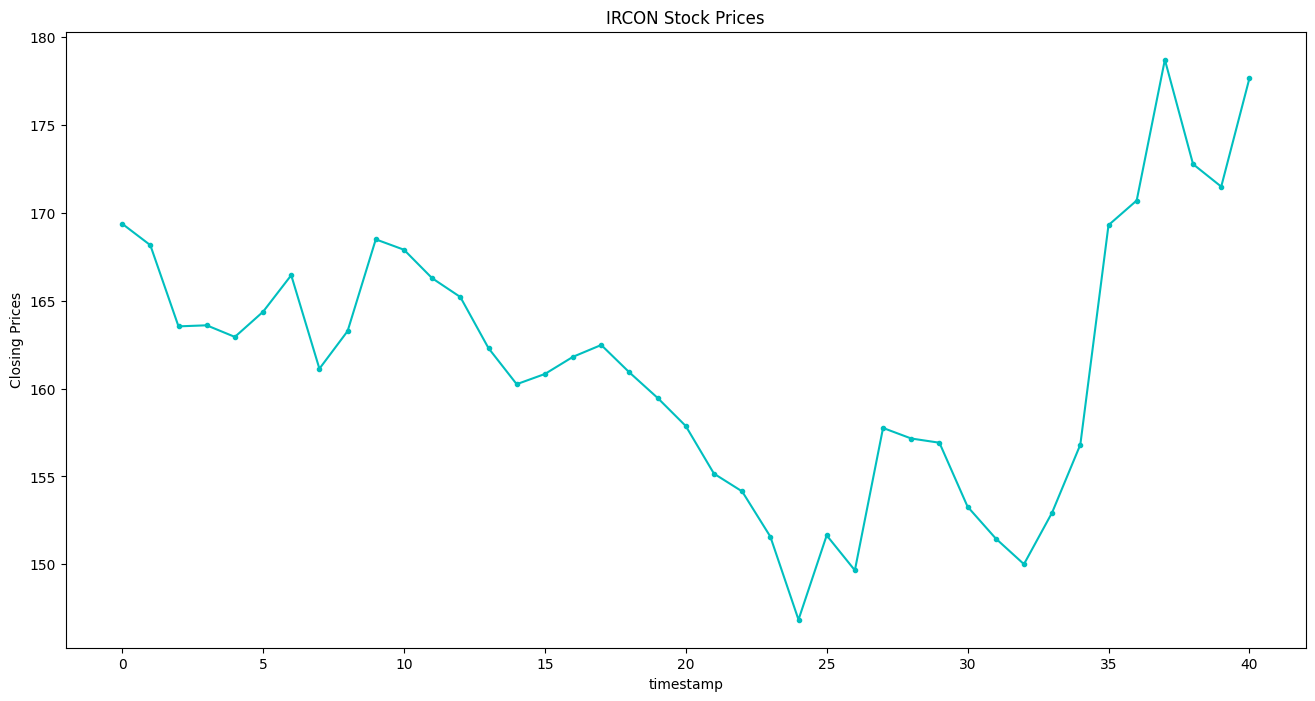

In [15]:
# Visualizing the time series
print("Plotting time series...")
plt.figure(figsize=(16,8))
plt.xlabel("timestamp")
plt.ylabel("Closing Prices")
plt.title('IRCON Stock Prices')
plt.plot(df['close'], color = 'c', marker='.')

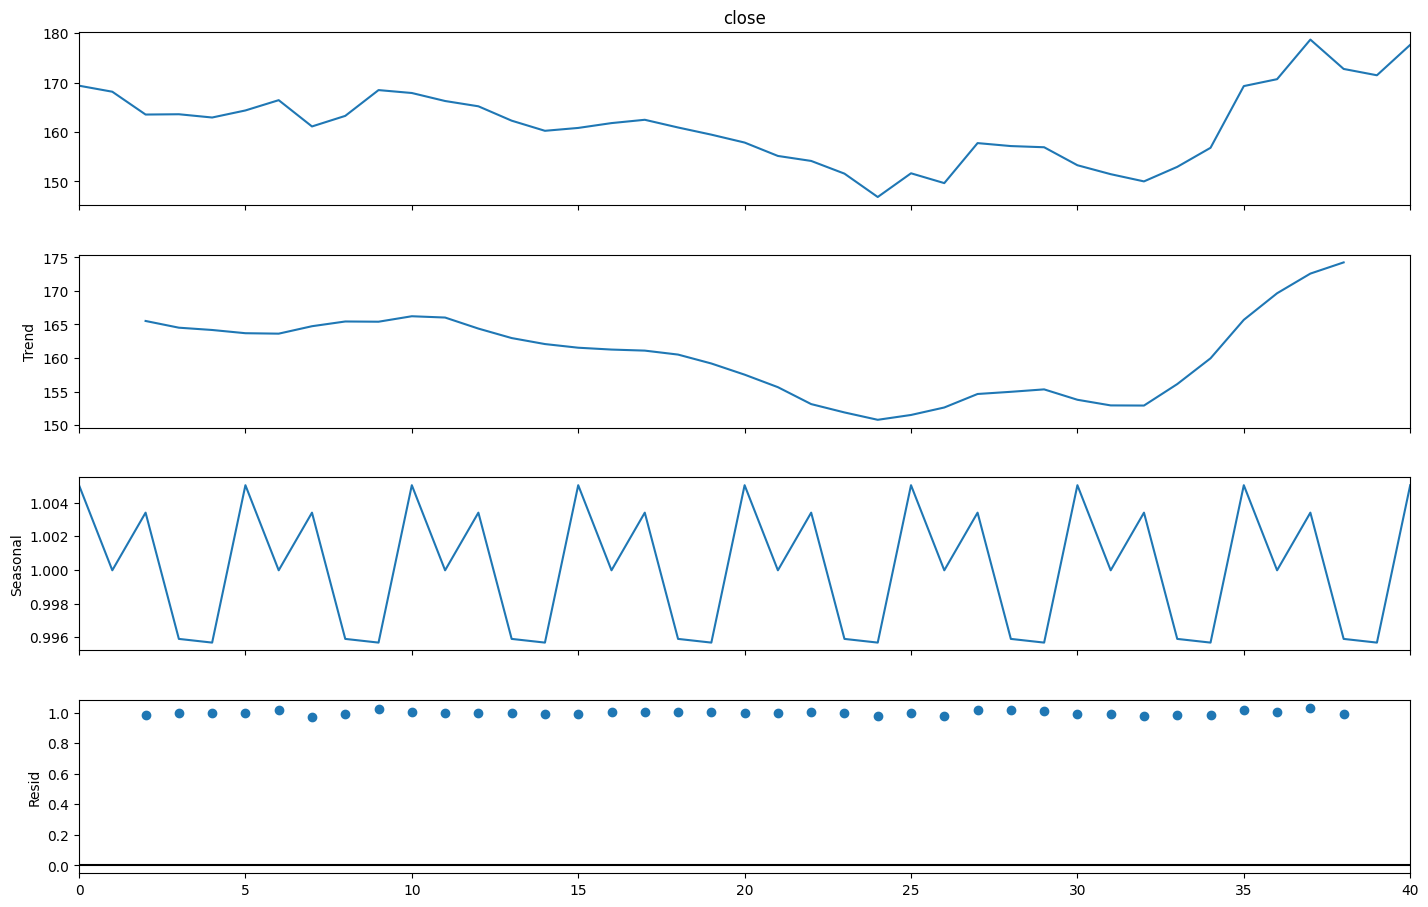

In [17]:
decomposition = smt.seasonal_decompose(df['close'], model='multiplicative', period=5)
fig = decomposition.plot()
fig.set_size_inches(16, 10)
plt.show()

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
print("Timestamp column converted to datetime and set as index.")
df.head()

Timestamp column converted to datetime and set as index.


,open,high,low,close,volume
timestamp,,,,,
2025-11-03,169.51,171.72,169.00,169.38,1253481
2025-11-04,169.63,169.89,167.47,168.16,1387725
2025-11-06,168.44,168.44,162.50,163.54,2004456
2025-11-07,162.90,164.00,159.71,163.60,1578924
2025-11-10,164.20,164.80,162.55,162.94,822240


**Reasoning**:
To create lagged features, I will use the `shift()` method on the 'close' column for 1, 2, and 3 periods. For moving averages, I will use the `rolling()` method with a window of 5 and 10, respectively, followed by `mean()`.



In [19]:
df['close_lag1'] = df['close'].shift(1)
df['close_lag2'] = df['close'].shift(2)
df['close_lag3'] = df['close'].shift(3)
df['SMA_5'] = df['close'].rolling(window=5).mean()
df['SMA_10'] = df['close'].rolling(window=10).mean()
print("Lagged features and Moving Averages created.")
df.head()

Lagged features and Moving Averages created.


,open,high,low,close,volume,close_lag1,close_lag2,close_lag3,SMA_5,SMA_10
timestamp,,,,,,,,,,
2025-11-03,169.51,171.72,169.00,169.38,1253481,NaN,NaN,NaN,NaN,NaN
2025-11-04,169.63,169.89,167.47,168.16,1387725,169.38,NaN,NaN,NaN,NaN
2025-11-06,168.44,168.44,162.50,163.54,2004456,168.16,169.38,NaN,NaN,NaN
2025-11-07,162.90,164.00,159.71,163.60,1578924,163.54,168.16,169.38,NaN,NaN
2025-11-10,164.20,164.80,162.55,162.94,822240,163.60,163.54,168.16,165.524,NaN


## Split Data into Training and Testing Sets

### Subtask:
Divide the dataset into training and testing sets to evaluate the model's performance on unseen data. The split should be sequential, considering the time-series nature of the data.


To split the data, we first define our features (X) and target (y). The target variable will be the 'close' price. For features, we'll use the 'close_lag1', 'close_lag2', 'close_lag3', 'SMA_5', and 'SMA_10' columns created in the previous step. Before splitting, it's crucial to drop any rows with `NaN` values that resulted from creating lagged features and moving averages, as these rows cannot be used for training. Finally, we'll perform a sequential split, allocating 80% of the data for the training set and the remaining 20% for the testing set to respect the temporal order of the time series data.

**Reasoning**:
Now I will implement the data splitting logic by identifying features and target, dropping rows with NaN values, and then performing a sequential split into training and testing sets based on the instructions provided.



In [20]:
df_cleaned = df.dropna()

X_train = df_cleaned[['close_lag1', 'close_lag2', 'close_lag3', 'SMA_5', 'SMA_10']]
y_train = df_cleaned['close']

In [30]:
# Instantiate the RandomForestRegressor model
rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rfr_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [31]:
y_pred = rfr_model.predict(X_train)
print("Predictions made on the train set.")


Predictions made on the train set.


In [32]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse) # Calculating RMSE as well
r2 = r2_score(y_train, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")
print("Model performance evaluated.")

Mean Absolute Error (MAE): 1.17
Mean Squared Error (MSE): 2.52
Root Mean Squared Error (RMSE): 1.59
R-squared (R2 ): 0.96
Model performance evaluated.


In [33]:
# 1. Extract the last row of features and relevant 'close' values from df_cleaned.
# Get the last 10 actual closing prices from df_cleaned to initialize the rolling window.
historical_closes_window = df_cleaned['close'].iloc[-10:].tolist()

# Get the last timestamp from df_cleaned
last_known_timestamp = df_cleaned.index[-1]

# 2. Create an empty list to store the future predictions.
future_predictions = []

# Generate future dates for the next 5 business days
future_dates = pd.date_range(start=last_known_timestamp + pd.Timedelta(days=1), periods=5, freq='B')

print(f"Starting predictions from: {last_known_timestamp.strftime('%Y-%m-%d')}")
print(f"Dates for prediction: {future_dates.strftime('%Y-%m-%d').tolist()}")

# 3. Iterate five times (for the next five days):
for i in range(5):
    # a. Use the trained rfr_model to predict the stock price for the next day,
    #    using the current features. Reshape the features to a 2D array if necessary.

    # Extract lagged values from the historical_closes_window
    current_lag1 = historical_closes_window[-1]
    current_lag2 = historical_closes_window[-2]
    current_lag3 = historical_closes_window[-3]

    # Calculate current SMA_5 and SMA_10 using the historical_closes_window
    current_sma_5 = np.mean(historical_closes_window[-5:])
    current_sma_10 = np.mean(historical_closes_window[-10:])

    # Form the feature vector for prediction
    features_for_prediction = np.array([
        current_lag1,
        current_lag2,
        current_lag3,
        current_sma_5,
        current_sma_10
    ]).reshape(1, -1) # Reshape to (1, n_features) for the model

    # Make the prediction
    next_day_predicted_price = rfr_model.predict(features_for_prediction)[0]

    # b. Append the predicted price to the list of future predictions.
    future_predictions.append(next_day_predicted_price)

    # c. Update the features for the next prediction:
    # The newly predicted price becomes the 'close' price for the next day.
    # Update the historical_closes_window by adding the new prediction and removing the oldest value.
    historical_closes_window.append(next_day_predicted_price)
    historical_closes_window.pop(0) # Remove the oldest element to maintain a window of 10

# 4. Convert the list of predictions into a pandas Series or DataFrame,
# adding appropriate future dates as an index.
predicted_series = pd.Series(future_predictions, index=future_dates, name='Predicted Close Price')

print("\nFuture Stock Price Predictions for the next 5 business days:")
print(predicted_series)

Starting predictions from: 2025-12-31
Dates for prediction: ['2026-01-01', '2026-01-02', '2026-01-05', '2026-01-06', '2026-01-07']

Future Stock Price Predictions for the next 5 business days:
2026-01-01    172.78065
2026-01-02    172.76285
2026-01-05    173.53120
2026-01-06    173.18085
2026-01-07    173.21225
Freq: B, Name: Predicted Close Price, dtype: float64


### Checking With real data

In [34]:
data = {
    "symbol": "NSE:IRCON-EQ",
    "resolution": "D",           # 'D' for Daily candles
    "date_format": "1",          # Set to '1' to use readable dates
    "range_from": "2026-01-01",  # Start date (yyyy-mm-dd)
    "range_to": "2026-01-07",    # End date (yyyy-mm-dd)
    "cont_flag": "1"             # Continuous data (keep as '1')
}

# Fetch and print the data
response = fyers.history(data=data)
print(response)

{'candles': [[1767225600, 177.6, 179.69, 175.51, 177.98, 3712327], [1767312000, 178.77, 182.37, 177.91, 179.22, 6334893], [1767571200, 179.22, 180.8, 176.22, 177.02, 2913926], [1767657600, 177.4, 181.53, 175.8, 177.26, 4488652], [1767744000, 177.26, 179.45, 175.86, 177.42, 2786316]], 'code': 200, 'message': '', 's': 'ok'}


In [35]:
# Convert to DataFrame
candles = response["candles"]
df_next5 = pd.DataFrame(
    candles,
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

# Convert timestamp
df_next5["timestamp"] = pd.to_datetime(df_next5["timestamp"], unit="s")

print(df_next5.head())

   timestamp    open    high     low   close   volume
0 2026-01-01  177.60  179.69  175.51  177.98  3712327
1 2026-01-02  178.77  182.37  177.91  179.22  6334893
2 2026-01-05  179.22  180.80  176.22  177.02  2913926
3 2026-01-06  177.40  181.53  175.80  177.26  4488652
4 2026-01-07  177.26  179.45  175.86  177.42  2786316


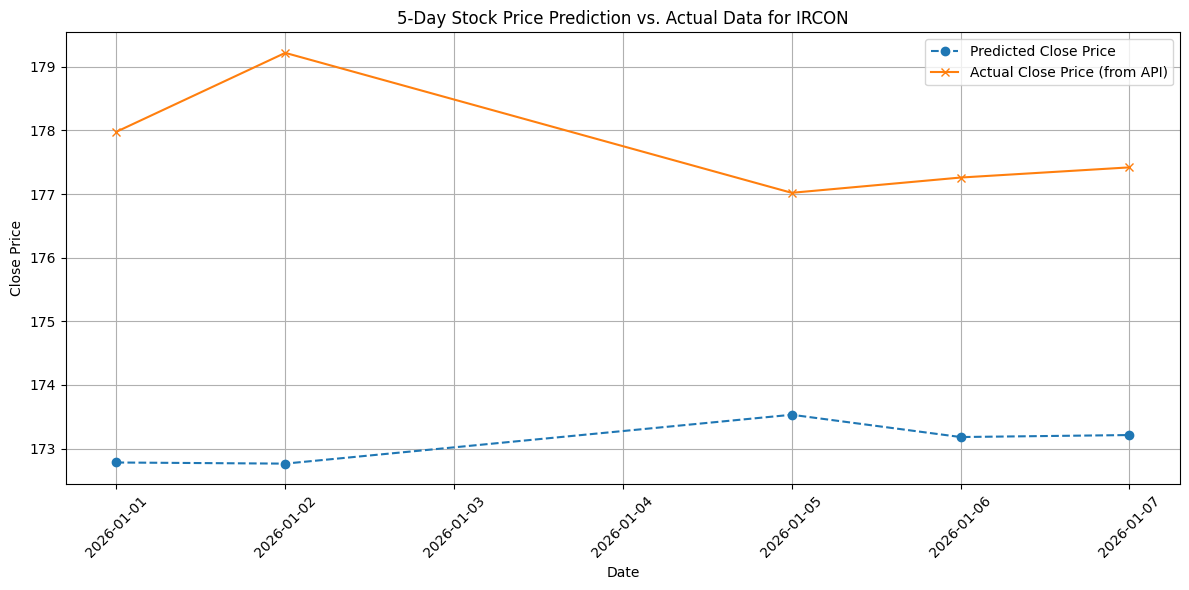

In [36]:
# Plotting the predicted prices against actual prices
plt.figure(figsize=(12, 6))
plt.plot(predicted_series.index, predicted_series.values, label='Predicted Close Price', marker='o', linestyle='--')
plt.plot(df_next5['timestamp'], df_next5['close'], label='Actual Close Price (from API)', marker='x', linestyle='-')

plt.title('5-Day Stock Price Prediction vs. Actual Data for IRCON')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()